In [ ]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost.sklearn import XGBClassifier
from sklearn.metrics import accuracy_score, roc_auc_score

In [2]:
import sys

sys.path.append('..')
from src.data.preprocessing import DataPreprocessor

df = pd.read_csv('../data/raw/data.csv')
X = df.drop('quality', axis=1)
y = df['quality']

dp = DataPreprocessor()
X_train, X_test, y_train, y_test = dp.fit_transform(X, y)

In [3]:
results = {}

In [4]:
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

results['Logisitc Regression'] = {
    'accuracy': accuracy_score(y_test, y_pred),
    'roc auc': roc_auc_score(y_test, y_pred)
}

In [5]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

results['Random Forest'] = {
    'accuracy': accuracy_score(y_test, y_pred),
    'roc auc': roc_auc_score(y_test, y_pred)
}

In [6]:
model = SVC(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

results['SVC'] = {
    'accuracy': accuracy_score(y_test, y_pred),
    'roc auc': roc_auc_score(y_test, y_pred)
}

In [7]:
model = XGBClassifier(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

results['XGB'] = {
    'accuracy': accuracy_score(y_test, y_pred),
    'roc auc': roc_auc_score(y_test, y_pred)
}

<Axes: >

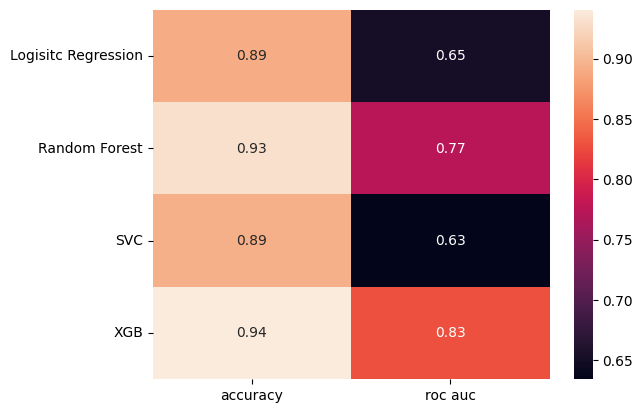

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.heatmap(pd.DataFrame.from_dict(results).T, annot=True, fmt='.2f', )